In [1]:
import pickle

In [33]:
df_docs_outside = pickle.load(open("df_docs_outside.pickle", "rb"))
weighted_cluster_1 = pickle.load(open("weighted_cluster_1.pickle", "rb"))
weighted_cluster_2 = pickle.load(open("weighted_cluster_2.pickle", "rb"))
weighted_cluster_3 = pickle.load(open("weighted_cluster_3.pickle", "rb"))

In [34]:
rel_columns = ['doc_clean',
 'topic_0',
 'topic_1',
 'topic_2',
 'topic_3',
 'topic_4',
 'topic_5']

In [35]:
train_set_c1 = weighted_cluster_1[rel_columns]
train_set_c2 = weighted_cluster_2[rel_columns]
train_set_c3 = weighted_cluster_3[rel_columns]

In [36]:
test_set = df_docs_outside["doc_clean"]

In [37]:
for j in range(3):    
    train_set = [train_set_c1, train_set_c2, train_set_c3][j]
    print(f" --Cluster {j}--")
    print("Size:", train_set.shape[0])
    for i in range(6):
        print(f"Size topic {i}:", train_set[train_set[f"topic_{i}"]>0].shape[0])

 --Cluster 0--
Size: 89
Size topic 0: 9
Size topic 1: 16
Size topic 2: 13
Size topic 3: 6
Size topic 4: 7
Size topic 5: 9
 --Cluster 1--
Size: 57
Size topic 0: 8
Size topic 1: 3
Size topic 2: 11
Size topic 3: 6
Size topic 4: 8
Size topic 5: 7
 --Cluster 2--
Size: 43
Size topic 0: 8
Size topic 1: 7
Size topic 2: 4
Size topic 3: 4
Size topic 4: 6
Size topic 5: 6


In [145]:
t = 1
train_set_c1_t0 = train_set_c1[f"doc_clean topic_{t}".split()].copy()
train_set_c1_t0["text"] = train_set_c1_t0["doc_clean"].apply(lambda x: " ".join(x))
train_set_c1_t0["y"] = (train_set_c1_t0[f"topic_{t}"]>0).astype(int)
train_set_c1_t0

,doc_clean,topic_1,text,y
0,"[student, learn, implicit, explicit, non, exis...",0.000000,student learn implicit explicit non existent c...,0
1,"[competence, base, approach, organizational, i...",0.000000,competence base approach organizational indivi...,0
2,"[develop, key, competency, project, base, lear...",0.000000,develop key competency project base learning g...,0
3,"[competency, professionals, empirical, study, ...",0.000000,competency professionals empirical study key c...,0
4,"[coach, prepare, student, school, work, transi...",0.000000,coach prepare student school work transition c...,0
...,...,...,...,...
84,"[evaluate, assessment, quality, competence, ba...",0.284201,evaluate assessment quality competence base ed...,1
85,"[export, failure, strange, case, national, voc...",0.319629,export failure strange case national vocationa...,1
86,"[reconsider, competence, attempt, david, bridg...",0.000000,reconsider competence attempt david bridges ju...,0
87,"[competence, base, education, training, progre...",0.228439,competence base education training progress vi...,1


In [146]:
train_set_c1_t0["y"].value_counts()

0    73
1    16
Name: y, dtype: int64

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import numpy as np

['sustainable_development', 'development_goal', 'competence', 'assessment', 'mobile', 'policy', 'covid', '19', 'culinary', 'vocational', 'european', 'hope', 'narrative', 'movement', 'philosophy', 'competence_movement', 'philosophy_education', 'practical_competence']
Wall time: 114 ms


C:\Users\felip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


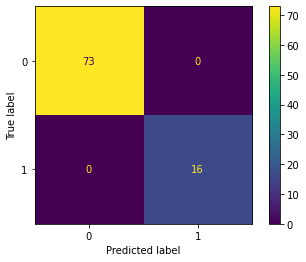

In [147]:
%%time
pipe = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),
    ("clf", LogisticRegression(
        C=15,
        penalty="l1", 
        class_weight="balanced", 
        solver="liblinear", 
        random_state=0))
])
pipe.fit(train_set_c1_t0["text"], train_set_c1_t0["y"])
ixs = np.where(pipe["clf"].coef_>0)[1]
cols = [k for k, v in pipe["tfidf"].vocabulary_.items() if v in ixs]
print(cols)
plot_confusion_matrix(pipe, train_set_c1_t0["text"], train_set_c1_t0["y"]);